<a href="https://colab.research.google.com/github/easy-min/cupid/blob/main/cupid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#[0] 공공데이터 불러오기 및 merge

In [ ]:
!apt-get update -qq   # 폰트 설정을 위한 코드
!apt-get install fonts-nanum* -qq

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt # 그래프
import seaborn as sns # 시각화
from sklearn.decomposition import PCA # PCA 활용
import seaborn as sns

In [ ]:
resource1 = pd.read_csv('/content/drive/MyDrive/cupid/전국통합식품영양성분정보(원재료성식품)표준데이터.csv', encoding='cp949')
resource2 = pd.read_csv('/content/drive/MyDrive/cupid/전국통합식품영양성분정보(가공식품)표준데이터.csv', encoding = 'cp949') # 공장에서 만든 가공식품
resource3 = pd.read_csv('/content/drive/MyDrive/cupid/전국통합식품영양성분정보(음식)표준데이터.csv', encoding='cp949') #외식(프랜차이즈 등 업체 제공 영양정보)

In [ ]:
resource1.head()

,식품코드,식품명,데이터구분코드,데이터구분명,식품기원코드,식품기원명,식품대분류코드,식품대분류명,대표식품코드,대표식품명,...,수입여부,데이터생성방법명,원산지국명,원산지역명,데이터생성방법코드,데이터생성일자,생산·채취·포획월,데이터기준일자,제공기관코드,제공기관명
0,R209-027074601-0000,소고기_한우(1+등급)_등심(윗등심살)_생것,R,원재료성 식품,2,동물성,9,육류,9027,소고기,...,N,분석,해당없음,해당없음,1,2017-04-01,NaN,2023-06-26,1390802,농촌진흥청 국립농업과학원
1,R209-027074701-0000,소고기_한우(1+등급)_사태(뒷사태)_생것,R,원재료성 식품,2,동물성,9,육류,9027,소고기,...,N,분석,해당없음,해당없음,1,2017-04-01,NaN,2023-06-26,1390802,농촌진흥청 국립농업과학원
2,R209-027074801-0000,소고기_한우(1+등급)_사태(뭉치사태)_생것,R,원재료성 식품,2,동물성,9,육류,9027,소고기,...,N,분석,해당없음,해당없음,1,2017-04-01,NaN,2023-06-26,1390802,농촌진흥청 국립농업과학원
3,R209-027074901-0000,소고기_한우(1+등급)_사태(상박살)_생것,R,원재료성 식품,2,동물성,9,육류,9027,소고기,...,N,분석,해당없음,해당없음,1,2017-04-01,NaN,2023-06-26,1390802,농촌진흥청 국립농업과학원
4,R209-027075001-0000,소고기_한우(1+등급)_사태(아롱사태)_생것,R,원재료성 식품,2,동물성,9,육류,9027,소고기,...,N,분석,해당없음,해당없음,1,2017-04-01,NaN,2023-06-26,1390802,농촌진흥청 국립농업과학원


In [ ]:
result = pd.merge(resource1, resource2, how='outer') # 값이 없을 경우 NA값으로 처리해서 통합
result = pd.merge(result, resource3, how='outer')

In [ ]:
result.head()

,식품코드,식품명,데이터구분코드,데이터구분명,식품기원코드,식품기원명,식품대분류코드,식품대분류명,대표식품코드,대표식품명,...,생산·채취·포획월,데이터기준일자,제공기관코드,제공기관명,1회 섭취참고량,제조사명,식품중량,수입업체명,유통업체명,업체명
0,R209-027074601-0000,소고기_한우(1+등급)_등심(윗등심살)_생것,R,원재료성 식품,2,동물성,9,육류,9027,소고기,...,NaN,2023-06-26,1390802,농촌진흥청 국립농업과학원,NaN,NaN,NaN,NaN,NaN,NaN
1,R209-027074701-0000,소고기_한우(1+등급)_사태(뒷사태)_생것,R,원재료성 식품,2,동물성,9,육류,9027,소고기,...,NaN,2023-06-26,1390802,농촌진흥청 국립농업과학원,NaN,NaN,NaN,NaN,NaN,NaN
2,R209-027074801-0000,소고기_한우(1+등급)_사태(뭉치사태)_생것,R,원재료성 식품,2,동물성,9,육류,9027,소고기,...,NaN,2023-06-26,1390802,농촌진흥청 국립농업과학원,NaN,NaN,NaN,NaN,NaN,NaN
3,R209-027074901-0000,소고기_한우(1+등급)_사태(상박살)_생것,R,원재료성 식품,2,동물성,9,육류,9027,소고기,...,NaN,2023-06-26,1390802,농촌진흥청 국립농업과학원,NaN,NaN,NaN,NaN,NaN,NaN
4,R209-027075001-0000,소고기_한우(1+등급)_사태(아롱사태)_생것,R,원재료성 식품,2,동물성,9,육류,9027,소고기,...,NaN,2023-06-26,1390802,농촌진흥청 국립농업과학원,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
result.to_csv('/content/drive/MyDrive/cupid/result')

In [ ]:
result.describe() #61470개의 리스트

,식품기원코드,식품대분류코드,대표식품코드,식품중분류코드,식품소분류코드,식품세분류코드,에너지(kcal),수분(g),단백질(g),지방(g),...,비타민 D(μg),콜레스테롤(mg),포화지방산(g),트랜스지방산(g),폐기율(%),출처코드,원산지국코드,데이터생성방법코드,생산·채취·포획월,제공기관코드
count,61470.000000,61470.000000,61470.000000,6.147000e+04,6.147000e+04,61470.000000,61470.000000,4980.000000,61470.000000,55244.000000,...,3435.000000,53015.000000,59286.000000,52202.00000,1890.000000,61470.000000,9990.000000,61470.000000,1100.000000,6.147000e+04
mean,1.205840,10.518334,10780.551798,1.057741e+06,1.057741e+08,0.623068,232.693818,65.845402,6.163564,9.642169,...,1.379642,15.982395,3.697156,0.04987,7.111111,2.910997,443.192593,1.935741,5.928182,1.460634e+06
std,0.587446,8.618225,8649.303664,8.646514e+05,8.646514e+07,5.409320,182.261287,30.110661,6.475393,15.900874,...,22.553720,38.024370,5.702547,0.24749,15.426402,0.416010,231.968437,0.283379,2.837633,4.797037e+04
min,1.000000,1.000000,1001.000000,1.000000e+05,1.000000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,31.000000,1.000000,1.000000,1.192266e+06
25%,1.000000,2.000000,2101.000000,2.000010e+05,2.000010e+07,0.000000,82.000000,59.100000,1.770000,0.600000,...,0.000000,0.000000,0.000000,0.00000,0.000000,3.000000,276.000000,2.000000,4.000000,1.471000e+06
50%,1.000000,9.000000,9302.000000,9.000030e+05,9.000030e+07,0.000000,190.000000,74.900000,5.000000,3.550000,...,0.000000,1.500000,1.140000,0.00000,0.000000,3.000000,410.000000,2.000000,6.000000,1.471000e+06
75%,1.000000,20.000000,20723.000000,2.072300e+06,2.072300e+08,0.000000,350.000000,83.300000,8.300000,12.590000,...,0.020000,16.670000,4.830000,0.00000,3.000000,3.000000,704.000000,2.000000,8.000000,1.471000e+06
max,7.000000,27.000000,27762.000000,2.776200e+06,2.776200e+08,99.000000,9840.000000,816.000000,215.000000,293.900000,...,1097.000000,3100.000000,93.400000,19.00000,90.000000,4.000000,860.000000,3.000000,12.000000,1.471000e+06


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/food.csv', encoding = 'cp949')

In [ ]:
df.describe()

,에너지(kcal),수분(g),단백질(g),지방(g),회분(g),탄수화물(g),당류(g),식이섬유(g),칼슘(mg),철(mg),...,비타민 C(mg),비타민 D(μg),콜레스테롤(mg),포화지방산(g),트랜스지방산(g),폐기율(%),출처코드,원산지국코드,데이터생성방법코드,제공기관코드
count,50000.00000,3826.000000,50000.000000,49982.000000,3794.000000,49973.000000,48247.000000,3002.000000,3650.000000,3328.000000,...,3096.000000,1982.000000,47872.000000,47971.000000,47726.000000,1890.000000,50000.000000,9886.000000,50000.000000,5.000000e+04
mean,242.70340,64.351620,5.991435,9.932996,2.576421,32.391039,13.462741,3.407095,115.285479,3.291800,...,17.521489,2.198234,15.129774,3.808579,0.049954,7.111111,2.882720,443.530548,1.930780,1.458256e+06
std,192.64317,32.626825,6.605427,16.583408,6.358968,26.894690,17.652063,6.863057,361.667564,11.121923,...,114.777970,29.653383,37.833314,6.109636,0.254007,15.426402,0.433231,231.947983,0.254381,5.290319e+04
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,31.000000,1.000000,1.192266e+06
25%,80.00000,57.900000,1.500000,0.440000,0.820000,10.000000,1.330000,0.000000,11.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,276.000000,2.000000,1.471000e+06
50%,190.00000,75.100000,5.000000,3.310000,1.250000,24.730000,6.300000,1.300000,37.000000,1.190000,...,1.000000,0.000000,0.000000,0.880000,0.000000,0.000000,3.000000,410.000000,2.000000,1.471000e+06
75%,373.00000,82.200000,8.000000,13.330000,1.970000,53.570000,18.330000,3.900000,100.000000,2.700000,...,10.000000,0.315000,15.000000,5.000000,0.000000,3.000000,3.000000,704.000000,2.000000,1.471000e+06
max,9840.00000,816.000000,215.000000,293.900000,99.780000,156.650000,107.670000,79.900000,9459.000000,320.000000,...,3333.330000,1097.000000,3100.000000,93.400000,19.000000,90.000000,3.000000,860.000000,3.000000,1.471000e+06


In [ ]:
df.isnull().sum()
#df.columns

식품코드                 0
식품명                  0
대식품명                 0
소식품명              3757
데이터구분코드              0
데이터구분명               0
음식 종류                0
에너지(kcal)            0
영양성분함량기준량            0
수분(g)            46174
단백질(g)               0
지방(g)               18
회분(g)            46206
탄수화물(g)             27
당류(g)             1753
식이섬유(g)          46998
칼슘(mg)           46350
철(mg)            46672
인(mg)            46939
칼륨(mg)           47504
나트륨(mg)           1535
비타민 A(μg RAE)    47283
레티놀(μg)          47355
베타카로틴(μg)        47845
티아민(mg)          47021
리보플라빈(mg)        47034
니아신(mg)          47158
비타민 C(mg)        46904
비타민 D(μg)        48018
콜레스테롤(mg)         2128
포화지방산(g)          2029
트랜스지방산(g)         2274
폐기율(%)           48110
출처코드                 0
출처명                  0
식품중량              3925
수입여부                 0
원산지국코드           40114
원산지국명                0
업체명                  0
데이터생성방법코드            0
데이터생성방법명             0
데이터생성일자              0
데이터기준일자    

In [ ]:
df_sample = df.loc[:, ['식품코드','식품명', '데이터구분코드', '에너지(kcal)', '수분(g)', '단백질(g)', '지방(g)', '회분(g)', '탄수화물(g)', '당류(g)', '식이섬유(g)',  '칼슘(mg)', '철(mg)', '인(mg)', '칼륨(mg)',
       '나트륨(mg)', '비타민 A(μg RAE)', '레티놀(μg)', '베타카로틴(μg)', '티아민(mg)', '리보플라빈(mg)', '니아신(mg)', '비타민 C(mg)', '비타민 D(μg)', '콜레스테롤(mg)', '포화지방산(g)', '트랜스지방산(g)']]

In [ ]:
df_sample.head()

,식품코드,식품명,데이터구분코드,에너지(kcal),수분(g),단백질(g),지방(g),회분(g),탄수화물(g),당류(g),...,레티놀(μg),베타카로틴(μg),티아민(mg),리보플라빈(mg),니아신(mg),비타민 C(mg),비타민 D(μg),콜레스테롤(mg),포화지방산(g),트랜스지방산(g)
0,R211-235012801-1210,"청어_수컷,육_생것_포항_2월",R,149,73.2,19.55,7.06,1.67,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,R211-235011601-1210,"청어_암컷,육_생것_포항_2월",R,98,71.8,18.90,1.99,1.48,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,R211-235012801-1211,"청어_수컷,육_생것_포항_3월",R,155,73.6,18.57,8.12,1.25,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,R211-235011601-1211,"청어_암컷,육_생것_포항_3월",R,182,71.4,18.32,11.14,1.12,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,R211-235012801-1212,"청어_수컷,육_생것_포항_4월",R,153,72.5,18.54,7.95,1.47,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#[1] 시각화

In [ ]:
df_sample.groupby('데이터구분코드').count()
# 식품 데이터 중 '원재료성 식품' R은 3608개, '가공된 식품' P는 46392개

,식품코드,식품명,에너지(kcal),수분(g),단백질(g),지방(g),회분(g),탄수화물(g),당류(g),식이섬유(g),...,레티놀(μg),베타카로틴(μg),티아민(mg),리보플라빈(mg),니아신(mg),비타민 C(mg),비타민 D(μg),콜레스테롤(mg),포화지방산(g),트랜스지방산(g)
데이터구분코드,,,,,,,,,,,,,,,,,,,,,
P,46392,46392,46392,228,46392,46392,228,46392,46392,965,...,227,233,498,483,430,700,490,46392,46392,46392
R,3608,3608,3608,3598,3608,3590,3566,3581,1855,2037,...,2418,1922,2481,2483,2412,2396,1492,1480,1579,1334


In [ ]:
df_sample.iloc[200:1000, :].head()

,식품코드,식품명,데이터구분코드,에너지(kcal),수분(g),단백질(g),지방(g),회분(g),탄수화물(g),당류(g),...,레티놀(μg),베타카로틴(μg),티아민(mg),리보플라빈(mg),니아신(mg),비타민 C(mg),비타민 D(μg),콜레스테롤(mg),포화지방산(g),트랜스지방산(g)
200,R106-194008047-0000,파프리카(착색단고추)_노란색_데친것,R,25,92.4,0.79,0.13,0.47,6.21,2.76,...,0.0,156.0,0.018,0.054,0.746,97.21,0.0,0.0,0.03,0.0
201,R106-194008101-0000,파프리카(착색단고추)_빨간색_생것,R,26,92.0,0.91,0.13,0.54,6.42,2.65,...,0.0,338.0,0.014,0.148,0.927,91.75,0.0,0.0,0.04,0.0
202,R106-194008147-0000,파프리카(착색단고추)_빨간색_데친것,R,28,91.5,0.92,0.13,0.54,6.91,2.68,...,0.0,311.0,0.000,0.156,0.898,109.89,0.0,0.0,0.04,0.0
203,R106-194008201-0000,파프리카(착색단고추)_주황색_생것,R,24,92.4,1.02,0.12,0.58,5.88,5.26,...,0.0,271.0,0.009,0.074,1.015,116.29,0.0,0.0,0.04,0.0
204,R106-194008247-0000,파프리카(착색단고추)_주황색_데친것,R,27,91.8,1.06,0.12,0.57,6.45,5.38,...,0.0,327.0,0.017,0.100,0.893,101.15,0.0,0.0,0.04,0.0


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45320 (\N{HANGUL SYLLABLE NEO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  func(*args, **

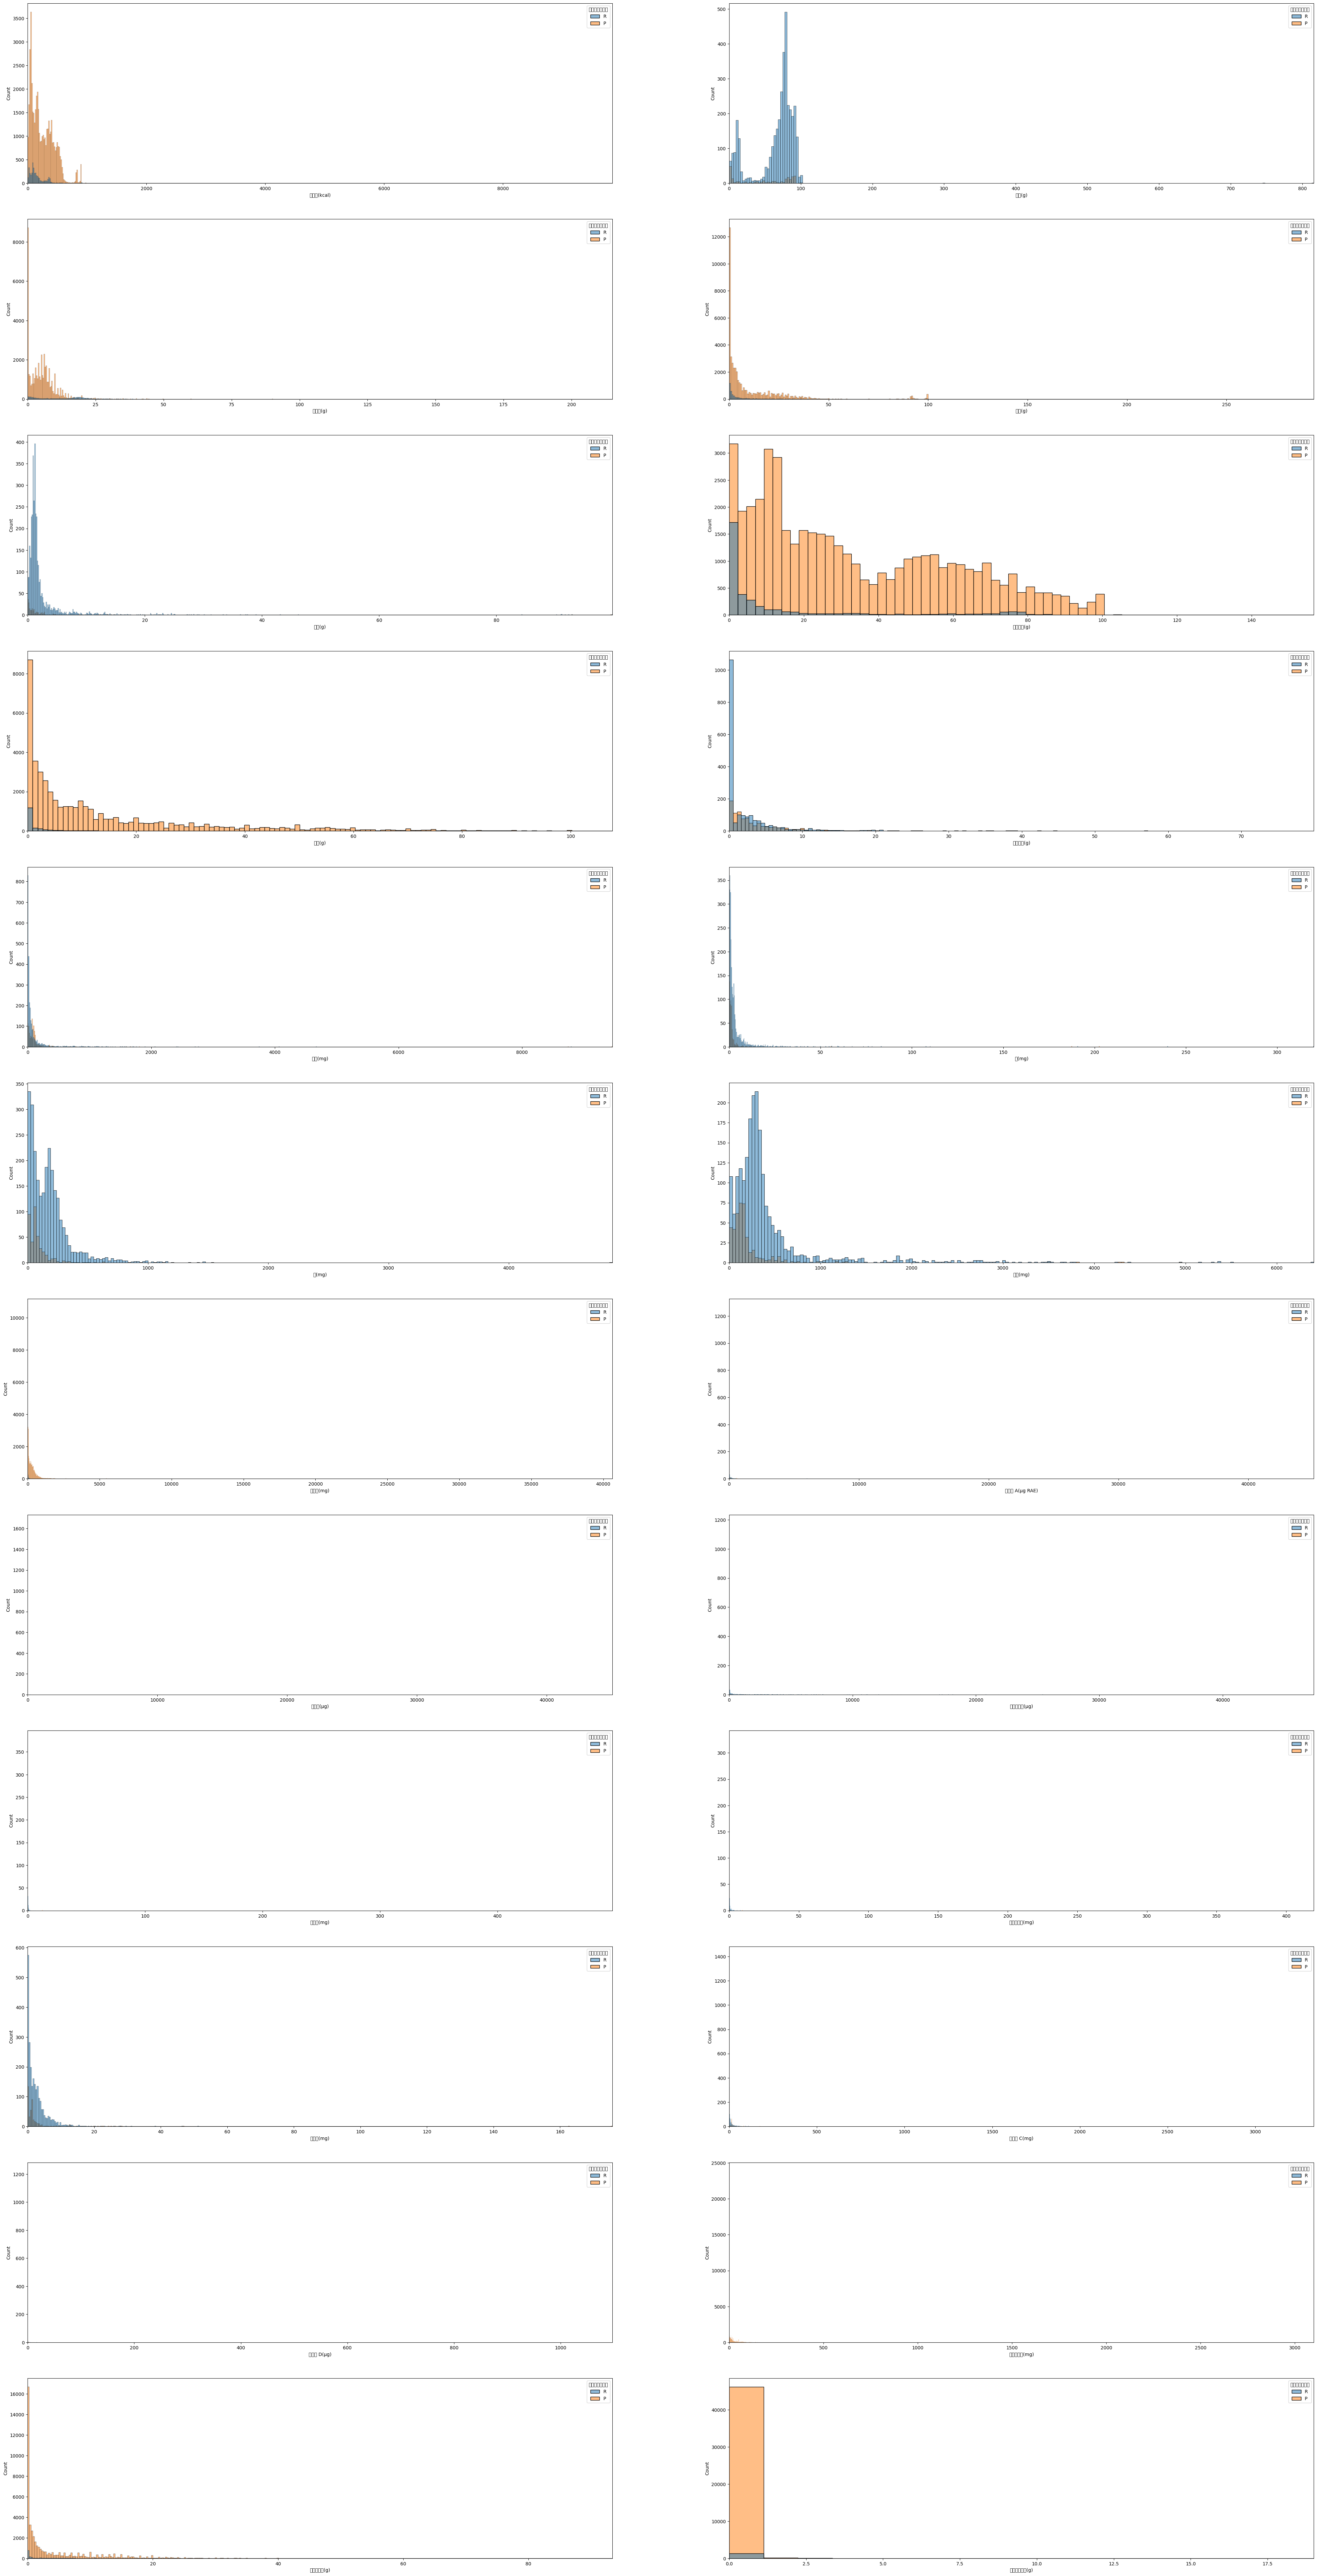

In [ ]:
plt.rc('font', family='NanumBarunGothic')
fig, axs = plt.subplots(figsize=(50, 100), ncols=2, nrows =12)
feature = ['에너지(kcal)', '수분(g)', '단백질(g)', '지방(g)', '회분(g)', '탄수화물(g)','당류(g)', '식이섬유(g)',  '칼슘(mg)', '철(mg)', '인(mg)', '칼륨(mg)',
       '나트륨(mg)', '비타민 A(μg RAE)', '레티놀(μg)', '베타카로틴(μg)', '티아민(mg)', '리보플라빈(mg)', '니아신(mg)', '비타민 C(mg)', '비타민 D(μg)', '콜레스테롤(mg)', '포화지방산(g)', '트랜스지방산(g)']
for i, feature in enumerate(feature):
  row = int(i/2)
  col=i%2
  sns.histplot(x=feature, hue='데이터구분코드', data=df_sample, ax=axs[row][col]).set(xlim=(0, df_sample[feature].max()))


In [ ]:
df_nature = df_sample[df_sample['데이터구분코드']=='R']
df_processed = df_sample[df_sample['데이터구분코드']=='P']
df_nature.to_csv('/content/drive/MyDrive/cupid/df_nature')
df_processed.to_csv('/content/drive/MyDrive/cupid/df_processed')

# [2] 가공처리된 식품군을 kmeans clutering을 이용해 분류

기존의 데이터셋에 정의된 대로, 원재료성 식품과 가공된 식품류 두 가지로만 분류하는 것의 어려움
- 가공된 식품류 간의 격차가 큼
- 상대적으로 더 몸에 안 좋은 가공식품과 그렇지 않은 가공식품 분류의 필요성

In [12]:
import pandas as pd
import matplotlib.pyplot as plt # 그래프
import seaborn as sns # 시각화
from sklearn.decomposition import PCA # PCA 활용
import seaborn as sns

In [4]:
processed = pd.read_csv('/content/drive/MyDrive/cupid/df_processed')
processed.head(30)

,Unnamed: 0,식품코드,식품명,데이터구분코드,에너지(kcal),수분(g),단백질(g),지방(g),회분(g),탄수화물(g),...,레티놀(μg),베타카로틴(μg),티아민(mg),리보플라빈(mg),니아신(mg),비타민 C(mg),비타민 D(μg),콜레스테롤(mg),포화지방산(g),트랜스지방산(g)
0,1829,P101-103000400-0082,비스킷/쿠키/크래커_게리코코넛크레커,P,505,NaN,5.05,22.48,NaN,70.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,17.52,0.00
1,1830,P101-103000400-0083,비스킷/쿠키/크래커_게메즈에낙스파이시,P,500,NaN,7.14,22.14,NaN,64.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.57,14.29,0.00
2,1831,P101-103000400-0084,비스킷/쿠키/크래커_계란과자,P,493,NaN,6.67,21.33,NaN,69.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.00,12.00,0.00
3,1832,P101-103000400-0085,비스킷/쿠키/크래커_계란과자,P,450,NaN,5.71,14.29,NaN,74.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.71,8.57,0.00
4,1833,P101-103000400-0086,비스킷/쿠키/크래커_고디바초콜릿쿠키,P,513,NaN,5.26,31.58,NaN,52.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.47,10.53,0.79
5,1834,P101-103000400-0087,비스킷/쿠키/크래커_고디바초콜릿쿠키l다크l,P,500,NaN,7.89,34.21,NaN,39.47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.11,13.16,0.79
6,1835,P101-103000400-0088,비스킷/쿠키/크래커_고멧참깨코코넛크래커,P,532,NaN,7.00,28.00,NaN,63.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,13.00,0.00
7,1836,P101-103000400-0089,비스킷/쿠키/크래커_고소미1979,P,475,NaN,10.53,17.11,NaN,69.74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,6.58,0.00
8,1837,P101-103000400-0090,비스킷/쿠키/크래커_고소미1979,P,460,NaN,10.00,16.00,NaN,69.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,7.00,0.00
9,1838,P101-103000400-0091,비스킷/쿠키/크래커_고소한참깨봉,P,489,NaN,7.78,19.56,NaN,71.11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,10.44,0.00


In [5]:
processed.describe()

,Unnamed: 0,에너지(kcal),수분(g),단백질(g),지방(g),회분(g),탄수화물(g),당류(g),식이섬유(g),칼슘(mg),...,레티놀(μg),베타카로틴(μg),티아민(mg),리보플라빈(mg),니아신(mg),비타민 C(mg),비타민 D(μg),콜레스테롤(mg),포화지방산(g),트랜스지방산(g)
count,46392.000000,46392.000000,228.000000,46392.000000,46392.000000,228.000000,46392.000000,46392.000000,965.000000,996.000000,...,227.000000,233.000000,498.000000,483.000000,430.000000,700.000000,490.000000,46392.000000,46392.000000,46392.000000
mean,26790.553199,249.655285,48.008772,5.361494,10.299692,3.104956,33.846548,13.872046,3.346839,115.704819,...,48.321586,179.330472,3.224898,3.206329,2.927500,44.297129,1.491122,14.423396,3.871808,0.049388
std,13415.283295,194.820769,35.883672,5.513236,16.822361,11.302427,26.616413,17.769654,3.954280,425.676565,...,229.983142,857.150300,33.557784,31.006727,12.223185,233.357665,5.071370,30.725375,6.147492,0.255525
min,1829.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15205.750000,83.000000,4.875000,1.300000,0.450000,0.240000,11.030000,1.600000,0.800000,27.750000,...,0.000000,0.000000,0.031000,0.060000,0.289000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26803.500000,200.000000,54.050000,4.780000,3.500000,0.820000,26.500000,6.995000,2.000000,75.000000,...,0.000000,0.000000,0.120000,0.150000,1.142500,4.730000,0.500000,0.000000,0.900000,0.000000
75%,38401.250000,383.000000,82.975000,7.500000,14.290000,2.155000,54.845000,19.000000,4.500000,111.000000,...,5.000000,24.000000,0.200000,0.250500,1.737500,15.965000,1.200000,15.000000,5.220000,0.000000
max,49999.000000,9840.000000,99.700000,100.000000,108.000000,99.780000,156.650000,107.670000,38.900000,9459.000000,...,2423.000000,9303.000000,497.740000,419.840000,175.676000,3333.330000,67.570000,1000.000000,93.400000,19.000000


In [6]:
processed.isnull().sum() #전체 값 46392개 중 NA값이 4만개가 넘는 컬럼 제거
# 수분, 회분, 식이섬유, 칼슘, 철, 인, 칼륨, 비타민, 레티놀, 베타카로틴, 티아민, 리보플라빈, 니아신, 비타민C, 비타민 D 등은 주로 자연식품에 존재하는 것들 (가공식품에는없음)

Unnamed: 0           0
식품코드                 0
식품명                  0
데이터구분코드              0
에너지(kcal)            0
수분(g)            46164
단백질(g)               0
지방(g)                0
회분(g)            46164
탄수화물(g)              0
당류(g)                0
식이섬유(g)          45427
칼슘(mg)           45396
철(mg)            45729
인(mg)            45985
칼륨(mg)           45965
나트륨(mg)              0
비타민 A(μg RAE)    45735
레티놀(μg)          46165
베타카로틴(μg)        46159
티아민(mg)          45894
리보플라빈(mg)        45909
니아신(mg)          45962
비타민 C(mg)        45692
비타민 D(μg)        45902
콜레스테롤(mg)            0
포화지방산(g)             0
트랜스지방산(g)            0
dtype: int64

In [7]:
processed = processed.drop(['수분(g)', '회분(g)', '식이섬유(g)', '칼슘(mg)', '철(mg)', '인(mg)', '칼륨(mg)',  '비타민 A(μg RAE)', '레티놀(μg)', '베타카로틴(μg)', '티아민(mg)', '리보플라빈(mg)', '니아신(mg)', '비타민 C(mg)', '비타민 D(μg)'], axis=1)

In [8]:
processed.isnull().sum()

Unnamed: 0    0
식품코드          0
식품명           0
데이터구분코드       0
에너지(kcal)     0
단백질(g)        0
지방(g)         0
탄수화물(g)       0
당류(g)         0
나트륨(mg)       0
콜레스테롤(mg)     0
포화지방산(g)      0
트랜스지방산(g)     0
dtype: int64

In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# kmeans clustering 하기 위한 준비 단계
k_processed = processed.loc[:, ['에너지(kcal)',  '단백질(g)', '지방(g)', '탄수화물(g)', '당류(g)', '나트륨(mg)',  '콜레스테롤(mg)', '포화지방산(g)', '트랜스지방산(g)']]
sc = StandardScaler()
s_processed = sc.fit_transform(k_processed)
pd.DataFrame(s_processed)

kmeans = KMeans(n_clusters = 2, random_state = 0)
clusters = kmeans.fit(s_processed)

processed['cluster'] = clusters.labels_
processed.head()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Unnamed: 0,식품코드,식품명,데이터구분코드,에너지(kcal),단백질(g),지방(g),탄수화물(g),당류(g),나트륨(mg),콜레스테롤(mg),포화지방산(g),트랜스지방산(g),cluster
0,1829,P101-103000400-0082,비스킷/쿠키/크래커_게리코코넛크레커,P,505,5.05,22.48,70.00,20.00,450.0,0.00,17.52,0.00,0
1,1830,P101-103000400-0083,비스킷/쿠키/크래커_게메즈에낙스파이시,P,500,7.14,22.14,64.29,5.00,929.0,33.57,14.29,0.00,0
2,1831,P101-103000400-0084,비스킷/쿠키/크래커_계란과자,P,493,6.67,21.33,69.33,24.00,227.0,60.00,12.00,0.00,0
3,1832,P101-103000400-0085,비스킷/쿠키/크래커_계란과자,P,450,5.71,14.29,74.29,34.29,200.0,35.71,8.57,0.00,0
4,1833,P101-103000400-0086,비스킷/쿠키/크래커_고디바초콜릿쿠키,P,513,5.26,31.58,52.63,44.74,276.0,39.47,10.53,0.79,0


In [21]:
processed_0 = processed[processed['cluster']==0]
processed_0.head()

,Unnamed: 0,식품코드,식품명,데이터구분코드,에너지(kcal),단백질(g),지방(g),탄수화물(g),당류(g),나트륨(mg),콜레스테롤(mg),포화지방산(g),트랜스지방산(g),cluster
0,1829,P101-103000400-0082,비스킷/쿠키/크래커_게리코코넛크레커,P,505,5.05,22.48,70.00,20.00,450.0,0.00,17.52,0.00,0
1,1830,P101-103000400-0083,비스킷/쿠키/크래커_게메즈에낙스파이시,P,500,7.14,22.14,64.29,5.00,929.0,33.57,14.29,0.00,0
2,1831,P101-103000400-0084,비스킷/쿠키/크래커_계란과자,P,493,6.67,21.33,69.33,24.00,227.0,60.00,12.00,0.00,0
3,1832,P101-103000400-0085,비스킷/쿠키/크래커_계란과자,P,450,5.71,14.29,74.29,34.29,200.0,35.71,8.57,0.00,0
4,1833,P101-103000400-0086,비스킷/쿠키/크래커_고디바초콜릿쿠키,P,513,5.26,31.58,52.63,44.74,276.0,39.47,10.53,0.79,0


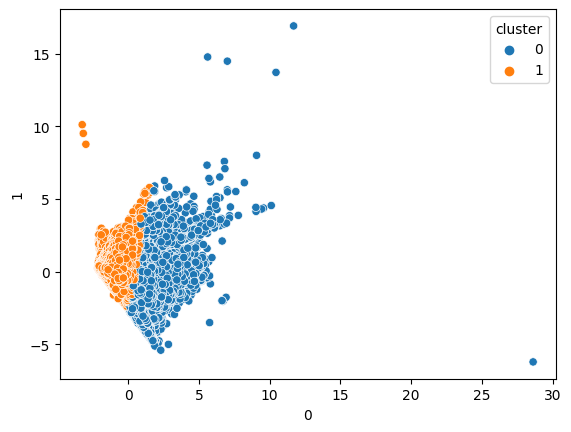

In [13]:
# pca 시각화 처리
X = s_processed.copy()
pca = PCA(n_components = 2) # 2개의 주성분을 갖는 객체 생성
pca.fit(X)
x_pca = pca.transform(X)
pca_df = pd.DataFrame(x_pca)
pca_df['cluster'] = processed['cluster']

axs = plt.subplots()
axs = sns.scatterplot(x=0, y=1, hue = 'cluster', data=pca_df)

In [14]:
processed.groupby('cluster').mean()

<ipython-input-14-26e0efa00115>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  processed.groupby('cluster').mean()


,Unnamed: 0,에너지(kcal),단백질(g),지방(g),탄수화물(g),당류(g),나트륨(mg),콜레스테롤(mg),포화지방산(g),트랜스지방산(g)
cluster,,,,,,,,,,
0,15009.772419,460.960517,6.283497,23.926082,55.061307,28.823414,239.958172,23.989795,9.325491,0.110562
1,32862.775455,140.741254,4.886261,3.276179,22.911727,6.165593,322.060301,9.492543,1.060791,0.017857


- 0번 : 초가공식품 : 상대적으로 가공음식 중에서도 kcal와 지방, 탄수화물, 당류, 콜레스테롤, 포화지방산이 높음
- 1번 : 가공식품 : 상대적으로 몸에 건강한 가공음식
- 2번 : 원재료성 식품 = 자연식품


- **콜레스테롤이 자연식품 분류에서 높은 이유**

콜레스테롤 자체는 나쁜 것이 X, 일반적으로 건강한 사람은 음식물을 통해 많은 양의 콜레스테롤이 체내로 들어오는 경우 소화기관에서 콜레스테롤의 흡수가 감소되고 체내에서 합성되는 것을 억제하여 혈중 콜레스테롤 수준이 높아지는 것을 억제. 다만 너무 많이 먹었을 경우 문제


#[3] 원재료성 식품, 가공된 식품 데이터 합치기

In [54]:
processed.to_csv('/content/drive/MyDrive/cupid/processed_complete')
df1 = pd.read_csv('/content/drive/MyDrive/cupid/processed_complete')
df2 = pd.read_csv('/content/drive/MyDrive/cupid/df_nature') #자연식품
df2['cluster'] = 2
df2 = df2.drop(['수분(g)', '회분(g)', '식이섬유(g)', '칼슘(mg)', '철(mg)', '인(mg)', '칼륨(mg)',  '비타민 A(μg RAE)', '레티놀(μg)', '베타카로틴(μg)', '티아민(mg)', '리보플라빈(mg)', '니아신(mg)', '비타민 C(mg)', '비타민 D(μg)'], axis=1)
food = pd.concat([df2, df1], axis=0)
food = food.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
food.to_csv('/content/drive/MyDrive/cupid/food')
food

,식품코드,식품명,데이터구분코드,에너지(kcal),단백질(g),지방(g),탄수화물(g),당류(g),나트륨(mg),콜레스테롤(mg),포화지방산(g),트랜스지방산(g),cluster
0,R211-235012801-1210,"청어_수컷,육_생것_포항_2월",R,149,19.55,7.06,0.00,NaN,NaN,NaN,NaN,NaN,2
1,R211-235011601-1210,"청어_암컷,육_생것_포항_2월",R,98,18.90,1.99,0.00,NaN,NaN,NaN,NaN,NaN,2
2,R211-235012801-1211,"청어_수컷,육_생것_포항_3월",R,155,18.57,8.12,0.00,NaN,NaN,NaN,NaN,NaN,2
3,R211-235011601-1211,"청어_암컷,육_생것_포항_3월",R,182,18.32,11.14,0.00,NaN,NaN,NaN,NaN,NaN,2
4,R211-235012801-1212,"청어_수컷,육_생것_포항_4월",R,153,18.54,7.95,0.00,NaN,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46387,P123-217020300-0205,떡볶이_핑크퐁아기상어떡볶이새콤달콤토마토맛,P,230,4.50,0.72,51.35,7.21,640.0,0.00,0.00,0.0,1
46388,P123-217020300-0206,떡볶이_핑크퐁아기상어매콤떡볶이,P,234,3.60,1.17,52.25,7.21,757.0,0.00,0.00,0.0,1
46389,P123-217020300-0207,떡볶이_핑크퐁아기상어짜장떡볶이,P,238,3.81,2.10,50.48,1.90,467.0,0.00,0.00,0.0,1
46390,P123-217020300-0208,떡볶이_하얀치볶이,P,205,7.57,9.73,22.16,1.08,341.0,27.03,1.19,0.0,1


In [55]:
food.groupby('cluster').mean()

<ipython-input-55-840520d0fc5f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  food.groupby('cluster').mean()


,에너지(kcal),단백질(g),지방(g),탄수화물(g),당류(g),나트륨(mg),콜레스테롤(mg),포화지방산(g),트랜스지방산(g)
cluster,,,,,,,,,
0,460.960517,6.283497,23.926082,55.061307,28.823414,239.958172,23.989795,9.325491,0.110562
1,140.741254,4.886261,3.276179,22.911727,6.165593,322.060301,9.492543,1.060791,0.017857
2,153.315410,14.091272,5.194340,13.534853,3.226361,305.983599,37.271858,1.950868,0.069633


#[4] 평가 : 실루엣 계수

우선 모든 데이터 쌍  (i,j) 에 대해 거리 혹은 비유사도(dissimilarity)을 구한다. 이 결과를 이용하여 모든 데이터  i 에 대해 다음 값을 구한다.

ai  :  i 와 같은 군집에 속한 원소들의 평균 거리
bi  :  i 와 다른 군집 중 가장 가까운 군집까지의 평균 거리
이 때 데이터  i 에 대한 실루엣계수는

si=bi−aimax(ai,bi)

로 정의한다. 전체 데이터의 실루엣계수를 평균된 값을 평균 실루엣계수라고 한다.

만약 데이터  i 에 대해 같은 군집의 데이터가 다른 군집의 데이터보다 더 가깝다면 그 데이터의 실수엣 계수는 양수가 된다. 하지만 만약 다른 군집의 데이터가 같은 군집의 데이터보다 더 가깝다면 군집화이 잘못된 경우라고 볼 수 있는데 이 때는 그 데이터의 실루엣계수가 음수가 된다. 잘못된 군집화에서는 실루엣계수가 음수인 데이터가 많아지므로 평균 실루엣계수가 작아진다. 따라서 실루엣계수가 클수록 좋은 군집화이라고 할 수 있다.

군집화 방법 중에는 군집의 개수를 사용자가 정해주어야 하는 것들이 있는데 실루엣계수는 이 경우 군집의 개수를 정하는데 큰 도움이 된다. 앞에서 예로 들었던 3개의 원형 데이터에 대해 K-평균 방법으로 군집 개수를 바꾸어가면서 군집화 결과를 살펴보자.

scikit-learn 패키지의 metrics 서브패키지는 실루엣계수를 계산하는 silhouette_samples 명령을 제공한다.


## [1] 가공 식품 내에서의 비교

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


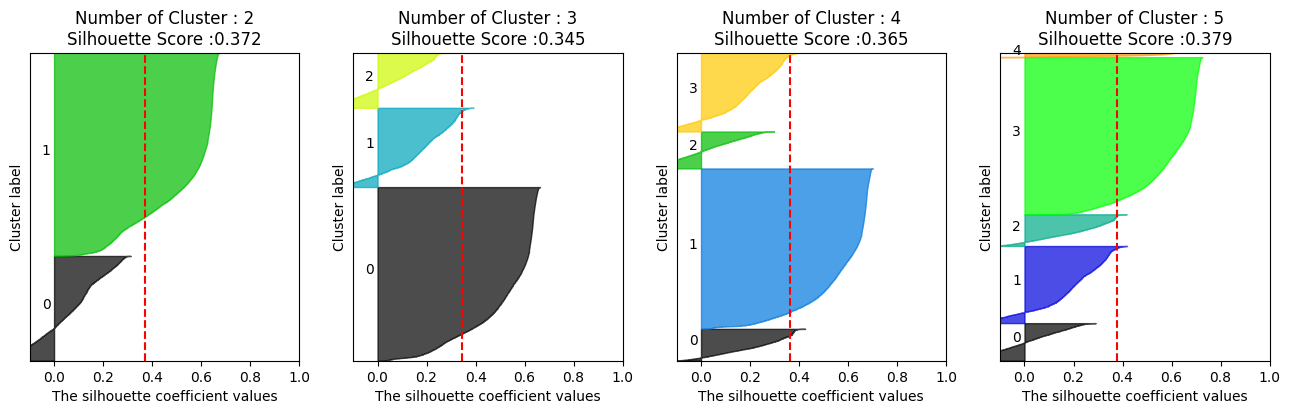

In [29]:
import math
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


def visualize_silhouette(cluster_lists, X_features):
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, random_state=0, max_iter=300)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")


visualize_silhouette([2, 3, 4, 5], s_processed)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


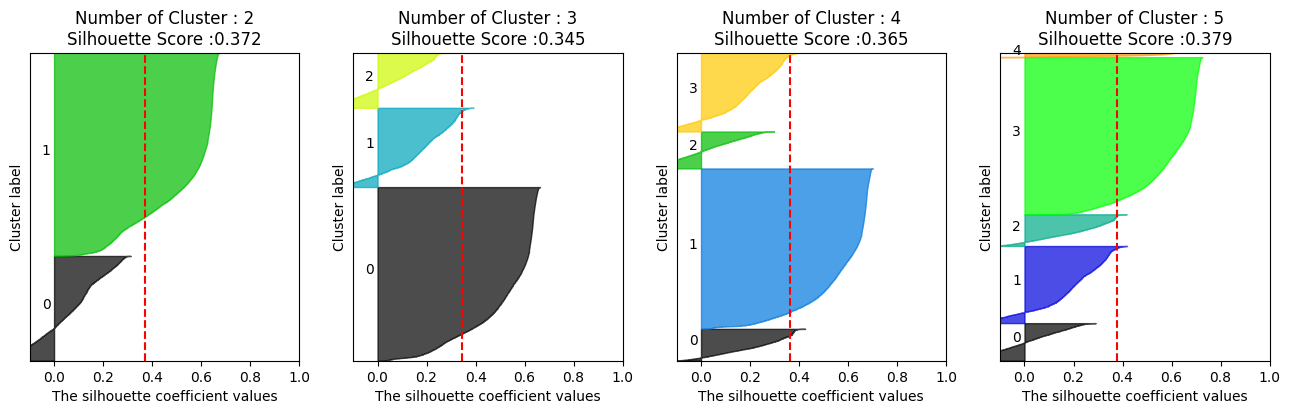

In [32]:
def visualize_silhouette2(cluster_lists, X_features):
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, random_state=0, max_iter=300, init='k-means++')
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")


visualize_silhouette2([2, 3, 4, 5], s_processed)

## [2] 모든 식품 내에서의 비교

In [56]:
food.isnull().sum()

식품코드            0
식품명             0
데이터구분코드         0
에너지(kcal)       0
단백질(g)          0
지방(g)          18
탄수화물(g)        27
당류(g)        1753
나트륨(mg)      1535
콜레스테롤(mg)    2128
포화지방산(g)     2029
트랜스지방산(g)    2274
cluster         0
dtype: int64

In [57]:
df1.isnull().sum()

Unnamed: 0.1    0
Unnamed: 0      0
식품코드            0
식품명             0
데이터구분코드         0
에너지(kcal)       0
단백질(g)          0
지방(g)           0
탄수화물(g)         0
당류(g)           0
나트륨(mg)         0
콜레스테롤(mg)       0
포화지방산(g)        0
트랜스지방산(g)       0
cluster         0
dtype: int64

In [58]:
df2.isnull().sum() # 원재료성 식품 내 결측치 존재

Unnamed: 0       0
식품코드             0
식품명              0
데이터구분코드          0
에너지(kcal)        0
단백질(g)           0
지방(g)           18
탄수화물(g)         27
당류(g)         1753
나트륨(mg)       1535
콜레스테롤(mg)     2128
포화지방산(g)      2029
트랜스지방산(g)     2274
cluster          0
dtype: int64

In [60]:
food = food.dropna()

In [61]:
food.describe()

,에너지(kcal),단백질(g),지방(g),탄수화물(g),당류(g),나트륨(mg),콜레스테롤(mg),포화지방산(g),트랜스지방산(g),cluster
count,47666.000000,47666.000000,47666.000000,47666.000000,47666.000000,47666.000000,47666.000000,47666.000000,47666.000000,47666.000000
mean,247.726136,5.482814,10.201926,33.503591,13.588293,290.086791,14.819300,3.815202,0.049958,0.695695
std,194.324525,5.827030,16.761259,26.709670,17.682167,709.578384,33.524381,6.111046,0.254139,0.514941
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,80.000000,1.330000,0.410000,11.000000,1.430000,20.000000,0.000000,0.000000,0.000000,0.000000
50%,200.000000,4.800000,3.440000,26.000000,6.595000,120.500000,0.000000,0.880000,0.000000,1.000000
75%,380.000000,7.500000,14.000000,54.500000,18.670000,350.000000,15.000000,5.000000,0.000000,1.000000
max,9840.000000,215.000000,108.000000,156.650000,107.670000,38330.000000,1040.920000,93.400000,19.000000,2.000000


In [62]:
df_food = food.loc[:, ['에너지(kcal)',  '단백질(g)', '지방(g)', '탄수화물(g)', '당류(g)', '나트륨(mg)',  '콜레스테롤(mg)', '포화지방산(g)', '트랜스지방산(g)']]
sc = StandardScaler()
df_food = sc.fit_transform(df_food)
pd.DataFrame(df_food)

,0,1,2,3,4,5,6,7,8
0,-1.110145,-0.410645,-0.588382,-1.024493,-0.749819,-0.406001,-0.442050,-0.612864,-0.196580
1,-1.022662,-0.110317,-0.579433,-0.910301,-0.728894,-0.404592,-0.442050,-0.609591,-0.196580
2,-1.079268,-0.789916,-0.598525,-0.936509,-0.570541,-0.407411,-0.442050,-0.619410,-0.196580
3,0.438827,0.363343,-0.464285,1.453661,1.372680,-0.403183,-0.442050,-0.586682,0.039513
4,-1.151314,-0.837968,-0.600911,-1.058564,-0.624268,-0.408820,-0.442050,-0.617773,-0.196580
...,...,...,...,...,...,...,...,...,...
47661,-0.091220,-0.168666,-0.565711,0.668170,-0.360723,0.493134,-0.442050,-0.624319,-0.196580
47662,-0.070636,-0.323121,-0.538863,0.701866,-0.360723,0.658022,-0.442050,-0.624319,-0.196580
47663,-0.050052,-0.287081,-0.483377,0.635597,-0.661028,0.249324,-0.442050,-0.624319,-0.196580
47664,-0.219872,0.358194,-0.028156,-0.424704,-0.707403,0.071752,0.364237,-0.429588,-0.196580


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


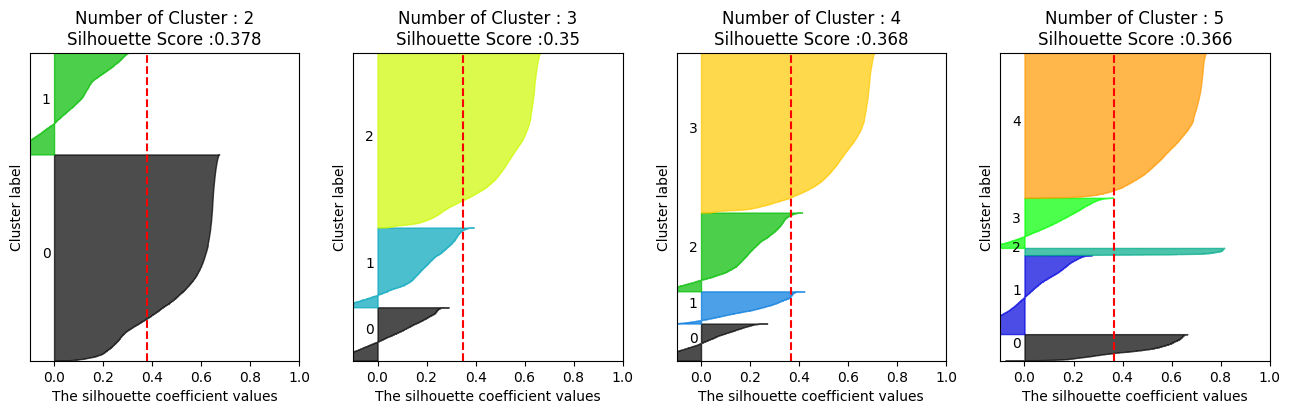

In [63]:
visualize_silhouette2([2, 3, 4, 5], df_food)